In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow .keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
data=pd.read_csv('C:/Users/hp/Desktop/dataset/Marksheets.csv')

In [4]:
data.shape

(40, 6)

In [5]:
data.head(5)

,Sr_no,campus,Alpha,Beta,Gama,Null
0,1,Beta,0,1,0,0
1,2,Gama,0,0,1,0
2,3,Null,0,0,0,1
3,4,Alpha,1,0,0,0
4,5,Beta,0,1,0,0


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
img_width=350
img_height=350

X=[]

for i in tqdm(range(data.shape[0])):
    path='C:/Users/hp/Desktop/dataset/marsheets/'+str(data['Sr_no'][i])+'.jpg'
    img=image.load_img(path,target_size=(img_width,img_height,3))
    img=image.img_to_array(img)
    img=img/255.0
    X.append(img)
    
X=np.array(X)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 42.76it/s]


In [8]:
X.shape

(40, 350, 350, 3)

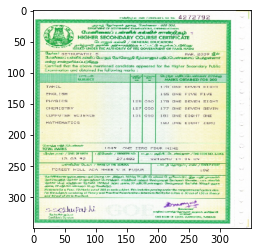

In [9]:
plt.imshow(X[0])

In [10]:
data['campus'][0]

'Beta'

In [11]:
y=data.drop([str('Sr_no'),'campus'],axis=1)
y=y.to_numpy()
y.shape

(40, 4)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15)

CNN 

In [14]:
model=Sequential()
model.add(Conv2D(16,(3,3), activation = 'relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
          
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3), activation = 'relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3), activation = 'relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
          
          
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Dense(4,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,epochs=6,validation_data=(X_test,y_test))

Train on 34 samples, validate on 6 samples
Epoch 1/6
34/34 [==============================] - 14s 401ms/sample - loss: 1.0263 - accuracy: 0.4853 - val_loss: 0.7040 - val_accuracy: 0.4167
Epoch 2/6
34/34 [==============================] - 10s 281ms/sample - loss: 0.9112 - accuracy: 0.5368 - val_loss: 0.6922 - val_accuracy: 0.4583
Epoch 3/6
34/34 [==============================] - 10s 283ms/sample - loss: 0.8829 - accuracy: 0.5368 - val_loss: 0.6518 - val_accuracy: 0.6250
Epoch 4/6
34/34 [==============================] - 10s 286ms/sample - loss: 0.7677 - accuracy: 0.6324 - val_loss: 0.6109 - val_accuracy: 0.7500
Epoch 5/6
34/34 [==============================] - 10s 280ms/sample - loss: 0.7892 - accuracy: 0.5735 - val_loss: 0.5898 - val_accuracy: 0.7500
Epoch 6/6
34/34 [==============================] - 10s 286ms/sample - loss: 0.7201 - accuracy: 0.6324 - val_loss: 0.5913 - val_accuracy: 0.7500


Testing

array([[0.24333596, 0.20124327, 0.44292453, 0.3279295 ]], dtype=float32)

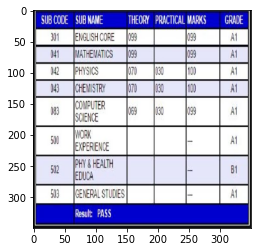

In [23]:
img=image.load_img('C:/Users/hp/Desktop/dataset/52.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_width,img_height,3)
classes=data.columns[2:]

y_prob=model.predict(img)
y_prob

In [21]:
model.save('marksheet_cnn_model3.h5')